SVM 

replace missing values using the most common value of the attribute among all examples with the same label

Min Max scaling, One-hot encoder

L1 regularization

0.82

### Import Data

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [42]:
train = pd.read_csv('C:/Users/박주형/OneDrive/바탕 화면/ML/Project/income2023f/train_final.csv')
test = pd.read_csv('C:/Users/박주형/OneDrive/바탕 화면/ML/Project/income2023f/test_final.csv')

### Pre-process

#### EDA

In [43]:
display(train.head())
display(test.head())

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income>50K
0,53,Self-emp-not-inc,93449,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,1
1,33,Self-emp-not-inc,123424,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,47,Private,144844,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,40,Private,114580,HS-grad,9,Divorced,Craft-repair,Other-relative,White,Female,0,0,40,Vietnam,0
4,39,Private,115618,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,0


,ID,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,1,33,Self-emp-not-inc,222162,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
1,2,68,?,29240,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,0,12,United-States
2,3,34,Private,103596,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States
3,4,57,Private,103403,5th-6th,3,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States
4,5,48,Private,152915,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States


In [44]:
x_train = train.iloc[:,:-1]
x_test = test.iloc[:,1:]
y_train = train.iloc[:,-1]

In [45]:
print(train.info())
print(train.describe())
print(train.shape)
print(test.info())
print(test.describe())
print(test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             25000 non-null  int64 
 1   workclass       25000 non-null  object
 2   fnlwgt          25000 non-null  int64 
 3   education       25000 non-null  object
 4   education.num   25000 non-null  int64 
 5   marital.status  25000 non-null  object
 6   occupation      25000 non-null  object
 7   relationship    25000 non-null  object
 8   race            25000 non-null  object
 9   sex             25000 non-null  object
 10  capital.gain    25000 non-null  int64 
 11  capital.loss    25000 non-null  int64 
 12  hours.per.week  25000 non-null  int64 
 13  native.country  25000 non-null  object
 14  income>50K      25000 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 2.9+ MB
None
                age        fnlwgt  education.num  capital.gain  capital.loss  \
count  2

#### Check different values in test data

In [46]:
# workclass
diff = [item for item in x_test['workclass'].unique()\
        if item not in x_train['workclass'].unique()]
diff

[]

In [47]:
x_train['workclass'].unique()

array(['Self-emp-not-inc', 'Private', 'Federal-gov', 'Local-gov',
       'Self-emp-inc', '?', 'State-gov', 'Never-worked', 'Without-pay'],
      dtype=object)

In [48]:
x_test['workclass'].unique()

array(['Self-emp-not-inc', '?', 'Private', 'State-gov', 'Federal-gov',
       'Self-emp-inc', 'Local-gov', 'Never-worked', 'Without-pay'],
      dtype=object)

In [49]:
# marital.status
diff = [item for item in x_test['marital.status'].unique()\
        if item not in x_train['marital.status'].unique()]
diff

[]

In [50]:
# occupation
diff = [item for item in x_test['occupation'].unique()\
        if item not in x_train['occupation'].unique()]
diff

[]

In [51]:
# relationship
diff = [item for item in x_test['relationship'].unique()\
        if item not in x_train['relationship'].unique()]
diff

[]

In [52]:
# race
diff = [item for item in x_test['race'].unique()\
        if item not in x_train['race'].unique()]
diff

[]

In [53]:
# native.country
diff = [item for item in x_test['native.country'].unique()\
        if item not in x_train['native.country'].unique()]
diff

['Holand-Netherlands']

#### Replace nan values -> most-frequent value of the attribute among all the examples with the same label

Check the most frequent value with the same label

In [54]:
# the most common value for attribute 'workclass' for each label 0 and 1
print('label 0:', train.loc[(train['occupation']!='?') & (train['income>50K']==0)].occupation.value_counts().index[0])
print('label 1:', train.loc[(train['occupation']!='?') & (train['income>50K']==1)].occupation.value_counts().index[0])

label 0: Other-service
label 1: Exec-managerial


In [55]:
# the most common value for attribute 'occupation' for each label 0 and 1
print('label 0:', train.loc[(train['occupation']!='?') & (train['income>50K']==0)].occupation.value_counts().index[0])
print('label 1:', train.loc[(train['occupation']!='?') & (train['income>50K']==1)].occupation.value_counts().index[0])

label 0: Other-service
label 1: Exec-managerial


In [56]:
# native.country
print(train.loc[(train['native.country']!='?') & (train['income>50K']==0)]["native.country"].value_counts(), "\n")

native.country
United-States                 16994
Mexico                          443
Philippines                     109
Puerto-Rico                      79
El-Salvador                      71
Germany                          68
Canada                           64
Cuba                             53
South                            52
India                            45
Guatemala                        44
China                            43
England                          42
Dominican-Republic               42
Jamaica                          39
Columbia                         38
Vietnam                          38
Poland                           36
Italy                            33
Portugal                         30
Japan                            27
Haiti                            26
Nicaragua                        26
Peru                             20
Iran                             20
Taiwan                           19
Ecuador                          16
Hong         

In [57]:
print(train.loc[(train['native.country']!='?') & (train['income>50K']==1)]["native.country"].value_counts())

native.country
United-States                 5522
Philippines                     43
India                           31
Germany                         31
Canada                          29
England                         26
Mexico                          20
Cuba                            17
Japan                           17
China                           17
Iran                            15
Italy                           15
Taiwan                          14
South                            9
Poland                           9
Puerto-Rico                      8
Jamaica                          7
El-Salvador                      6
France                           6
Yugoslavia                       6
Greece                           6
Portugal                         6
Ireland                          6
Vietnam                          5
Thailand                         4
Hungary                          4
Haiti                            4
Hong                             4
Colum

replace the values

In [58]:
# workclass
x_train.loc[train['workclass'] =='?', 'workclass'] = 'Private'

In [59]:
# occupation
x_train.loc[(train['occupation']=='?') & (train['income>50K']==0), 'occupation'] = 'Other-service'
x_train.loc[(train['occupation']=='?') & (train['income>50K']==1), 'occupation'] = 'Exec-managerial'

In [60]:
# native.country
x_train.loc[train['native.country'] =='?', 'native.country'] = 'United-States'

In [61]:
columns = x_train.columns
imputer = SimpleImputer(strategy='most_frequent')
x_train = imputer.fit_transform(x_train)
x_train = pd.DataFrame(x_train, columns=columns)
x_train

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,53,Self-emp-not-inc,93449,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India
1,33,Self-emp-not-inc,123424,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
2,47,Private,144844,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
3,40,Private,114580,HS-grad,9,Divorced,Craft-repair,Other-relative,White,Female,0,0,40,Vietnam
4,39,Private,115618,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,18,Private,83451,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,25,United-States
24996,64,Local-gov,202738,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,35,United-States
24997,39,Private,225544,Masters,14,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,Poland
24998,53,Private,346871,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Male,4787,0,46,United-States


Drop column 'education'

In [62]:
x_train.drop(columns='education', inplace=True)
x_test.drop(columns='education', inplace=True)

Label Encoding

In [63]:
x_test.loc[x_test['workclass']=='?', 'workclass'] = np.nan
x_test.loc[x_test['occupation']=='?', 'occupation'] = np.nan
x_test.loc[x_test['native.country']=='?', 'native.country'] = np.nan
x_test.loc[x_test['native.country']=='Holand-Netherlands', 'native.country'] = 'United-States'

In [64]:
# Replace nan values -> most-frequent values in test data
columns = x_test.columns
imputer = SimpleImputer(strategy='most_frequent')
x_test = imputer.fit_transform(x_test)
x_test = pd.DataFrame(x_test, columns=columns)
x_test

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,33,Self-emp-not-inc,222162,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
1,68,Private,29240,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,0,12,United-States
2,34,Private,103596,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States
3,57,Private,103403,3,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States
4,48,Private,152915,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23837,26,Private,43408,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States
23838,27,Private,116372,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States
23839,67,Self-emp-inc,182581,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,20051,0,20,United-States
23840,46,Local-gov,274689,12,Divorced,Protective-serv,Not-in-family,White,Male,0,0,40,United-States


In [65]:
# Min Max Scaler, One Hot encoding
numeric = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
categories = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

scaler = MinMaxScaler()

# Min Max Scaler
x_train[numeric] = scaler.fit_transform(x_train[numeric])
x_test[numeric] = scaler.transform(x_test[numeric])

# One Hot Encoding
x_train_cat = pd.get_dummies(x_train[categories]).astype(int)
x_test_cat = pd.get_dummies(x_test[categories]).astype(int)

# Concatenate the DataFrames
x_train = pd.concat([x_train[numeric], x_train_cat], axis=1)
x_test = pd.concat([x_test[numeric], x_test_cat], axis=1)

display(x_train.head())
display(x_test.head())

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,0.493151,0.054910,0.933333,0.0,0.0,0.397959,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.219178,0.075190,0.800000,0.0,0.0,0.397959,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.410959,0.089681,0.533333,0.0,0.0,0.397959,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.315068,0.069206,0.533333,0.0,0.0,0.397959,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0.301370,0.069909,0.533333,0.0,0.0,0.500000,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,0.219178,0.141990,0.533333,0.0,0.0,0.397959,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.698630,0.011471,0.533333,0.0,0.0,0.112245,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.232877,0.061775,0.533333,0.0,0.0,0.397959,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.547945,0.061645,0.133333,0.0,0.0,0.397959,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.424658,0.095141,0.600000,0.0,0.0,0.397959,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


### Correlation

In [66]:
df_corr = pd.concat([x_train, y_train], axis=1)
df_corr

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income>50K
0,0.493151,0.054910,0.933333,0.00000,0.0,0.397959,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.219178,0.075190,0.800000,0.00000,0.0,0.397959,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0.410959,0.089681,0.533333,0.00000,0.0,0.397959,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.315068,0.069206,0.533333,0.00000,0.0,0.397959,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.301370,0.069909,0.533333,0.00000,0.0,0.500000,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.013699,0.048146,0.533333,0.00000,0.0,0.244898,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
24996,0.643836,0.128849,0.533333,0.00000,0.0,0.346939,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
24997,0.301370,0.144278,0.866667,0.00000,0.0,0.397959,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
24998,0.493151,0.226360,0.533333,0.04787,0.0,0.459184,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1


In [67]:
df_corr.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income>50K
age,1.000000,-0.078625,0.024302,0.069499,0.052937,0.062499,0.049869,0.061341,-0.018035,-0.191488,...,0.008697,0.011128,0.004414,-0.011474,-0.004894,0.004024,0.006976,-0.009768,0.008047,0.225395
fnlwgt,-0.078625,1.000000,-0.028920,0.002078,-0.004235,-0.010462,-0.010526,0.006812,0.009041,0.036053,...,0.007355,-0.005113,-0.014952,0.000672,0.003321,0.006780,-0.073257,-0.009417,0.003426,-0.001345
education.num,0.024302,-0.028920,1.000000,0.127601,0.080867,0.144831,0.055762,0.095739,-0.010289,-0.170876,...,-0.038349,-0.001339,0.009902,0.044275,0.002598,-0.013007,0.127957,-0.007192,-0.008557,0.335894
capital.gain,0.069499,0.002078,0.127601,1.000000,-0.031974,0.080281,-0.000710,-0.010227,-0.002079,-0.057373,...,-0.006931,-0.002321,-0.000741,0.012487,-0.001846,-0.003063,0.003463,-0.001766,-0.001492,0.226695
capital.loss,0.052937,-0.004235,0.080867,-0.031974,1.000000,0.054771,0.001046,0.005877,-0.003076,-0.022881,...,0.010146,-0.005148,0.005215,0.008355,0.001113,0.001939,0.009384,0.008854,-0.005148,0.151825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native.country_Trinadad&Tobago,0.004024,0.006780,-0.013007,-0.003063,0.001939,-0.008083,0.005005,-0.000224,-0.000358,-0.000054,...,-0.001495,-0.000599,-0.001252,-0.000920,-0.000599,1.000000,-0.084516,-0.001050,-0.000599,-0.006846
native.country_United-States,0.006976,-0.073257,0.127957,0.003463,0.009384,0.006077,0.015618,0.025476,0.004235,-0.040847,...,-0.197358,-0.079054,-0.165171,-0.121418,-0.079054,-0.084516,1.000000,-0.138626,-0.079054,0.036435
native.country_Vietnam,-0.009768,-0.009417,-0.007192,-0.001766,0.008854,-0.007908,-0.001465,-0.003066,-0.000587,0.008282,...,-0.002453,-0.000983,-0.002053,-0.001509,-0.000983,-0.001050,-0.138626,1.000000,-0.000983,-0.012076
native.country_Yugoslavia,0.008047,0.003426,-0.008557,-0.001492,-0.005148,0.007984,-0.004105,0.000649,-0.000335,-0.005915,...,-0.001399,-0.000560,-0.001171,-0.000861,-0.000560,-0.000599,-0.079054,-0.000983,1.000000,0.010407


### SMOTE data imbalance

In [68]:
y_train.value_counts()

income>50K
0    18984
1     6016
Name: count, dtype: int64

Pie chart

In [69]:
# before SMOTE
y_train.value_counts()

income>50K
0    18984
1     6016
Name: count, dtype: int64

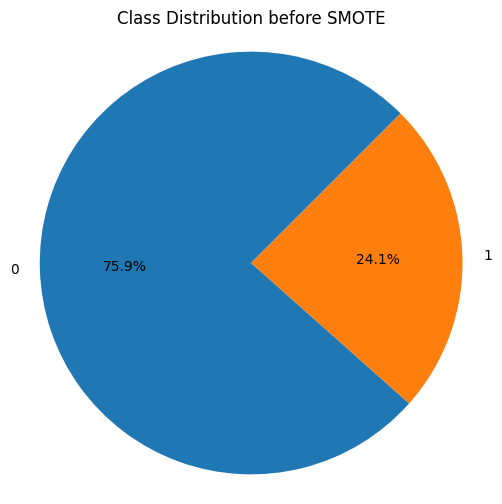

In [70]:
plt.figure(figsize=(6, 6))
plt.pie(y_train.value_counts(), labels=y_train.value_counts().index, autopct='%1.1f%%', startangle=45)
plt.axis('equal')  # 원형 파이 차트로 설정
plt.title('Class Distribution before SMOTE')  # 차트 제목
plt.show()

In [71]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

In [72]:
# after SMOTE
y_train.value_counts()

income>50K
1    18984
0    18984
Name: count, dtype: int64

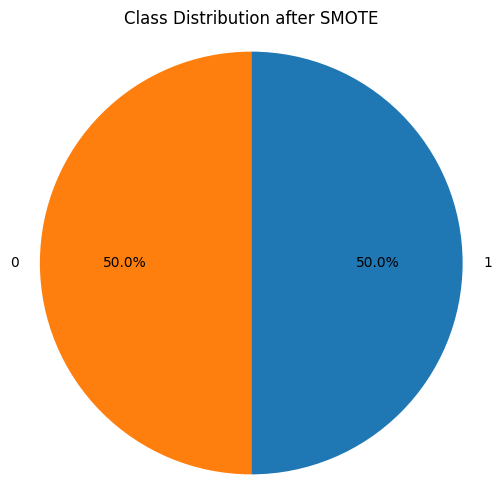

In [73]:
plt.figure(figsize=(6, 6))
plt.pie(y_train.value_counts(), labels=y_train.value_counts().index, autopct='%1.1f%%', startangle=270)
plt.axis('equal')  # 원형 파이 차트로 설정
plt.title('Class Distribution after SMOTE')  # 차트 제목
plt.show()

### Model

SVM

In [74]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [75]:
svm_classifier = LinearSVC(penalty='l1', dual=False)  

# Use SelectFromModel to perform feature selection based on L1 regularization
feature_selector = SelectFromModel(svm_classifier)

# Fit the feature selector on the training data
feature_selector.fit(x_train, y_train)

# Transform the training and testing data to keep only selected features
x_train_selected = feature_selector.transform(x_train)
x_test_selected = feature_selector.transform(x_test)

# Train the SVM classifier on the selected features
svm_classifier.fit(x_train_selected, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(x_test_selected)
y_pred

C:\Users\박주형\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\박주형\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [76]:
len(y_pred)

23842

In [77]:
df = pd.DataFrame(y_pred, columns=['Prediction'])
df['ID'] = test['ID']

In [78]:
df = df[['ID', "Prediction"]]
df

,ID,Prediction
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
23837,23838,1
23838,23839,0
23839,23840,1
23840,23841,0


### Save csv file

In [79]:
df.to_csv('C:/Users/박주형/OneDrive/바탕 화면/ML/Project/output.csv', index=False)
output = pd.read_csv('C:/Users/박주형/OneDrive/바탕 화면/ML/Project/output.csv')

In [80]:
output

,ID,Prediction
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
23837,23838,1
23838,23839,0
23839,23840,1
23840,23841,0
